In [1]:
import pandas as pd


In [2]:
dataset = pd.read_csv('/content/CarPricesPrediction.csv')

In [4]:
dataset.head()

,Unnamed: 0,Make,Model,Year,Mileage,Condition,Price
0,0,Ford,Silverado,2022,18107,Excellent,19094.75
1,1,Toyota,Silverado,2014,13578,Excellent,27321.10
2,2,Chevrolet,Civic,2016,46054,Good,23697.30
3,3,Ford,Civic,2022,34981,Excellent,18251.05
4,4,Chevrolet,Civic,2019,63565,Excellent,19821.85


In [7]:
dataset1 = dataset.drop(columns=['Unnamed: 0'])

In [9]:
dataset1.head()

,Make,Model,Year,Mileage,Condition,Price
0,Ford,Silverado,2022,18107,Excellent,19094.75
1,Toyota,Silverado,2014,13578,Excellent,27321.10
2,Chevrolet,Civic,2016,46054,Good,23697.30
3,Ford,Civic,2022,34981,Excellent,18251.05
4,Chevrolet,Civic,2019,63565,Excellent,19821.85


In [10]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Make       1000 non-null   object 
 1   Model      1000 non-null   object 
 2   Year       1000 non-null   int64  
 3   Mileage    1000 non-null   int64  
 4   Condition  1000 non-null   object 
 5   Price      1000 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 47.0+ KB


In [13]:
# Re-load the dataset to work with original categorical columns before Label Encoding
dataset_ohe = pd.read_csv('/content/CarPricesPrediction.csv')

# Drop the 'Unnamed: 0' column again
dataset_ohe = dataset_ohe.drop(columns=['Unnamed: 0'])

# Identify categorical columns
categorical_cols_ohe = dataset_ohe.select_dtypes(include=['object']).columns

# Apply One Hot Encoding
dataset_ohe = pd.get_dummies(dataset_ohe, columns=categorical_cols_ohe)

print("Dataset after One Hot Encoding:")
display(dataset_ohe.head())

Dataset after One Hot Encoding:


,Year,Mileage,Price,Make_Chevrolet,Make_Ford,Make_Honda,Make_Nissan,Make_Toyota,Model_Altima,Model_Camry,Model_Civic,Model_F-150,Model_Silverado,Condition_Excellent,Condition_Fair,Condition_Good
0,2022,18107,19094.75,False,True,False,False,False,False,False,False,False,True,True,False,False
1,2014,13578,27321.10,False,False,False,False,True,False,False,False,False,True,True,False,False
2,2016,46054,23697.30,True,False,False,False,False,False,False,True,False,False,False,False,True
3,2022,34981,18251.05,False,True,False,False,False,False,False,True,False,False,True,False,False
4,2019,63565,19821.85,True,False,False,False,False,False,False,True,False,False,True,False,False


In [18]:
x = dataset_ohe.drop(columns = ['Price'])
y = dataset_ohe['Price']

In [19]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(
    x,y, random_state=42, test_size= 0.2
)

In [20]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(xtrain,ytrain)
lr.score(xtest,ytest)

0.9999999997642388

In [21]:
from sklearn.metrics import mean_squared_error as mse
predicted = lr.predict(xtest)
error = mse(ytest, predicted) ** .5
print(error)

0.06911778772712468


In [22]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

models = [RandomForestRegressor(), DecisionTreeRegressor(), LinearRegression()]

errors = {}

for model in models:
    model.fit(xtrain,ytrain)
    name = type(model).__name__
    score = model.score(xtest,ytest)*100
    errors[name] = score

In [23]:
errors

{'RandomForestRegressor': 99.90453610238494,
 'DecisionTreeRegressor': 99.86678131677714,
 'LinearRegression': 99.99999997642388}

<BarContainer object of 3 artists>

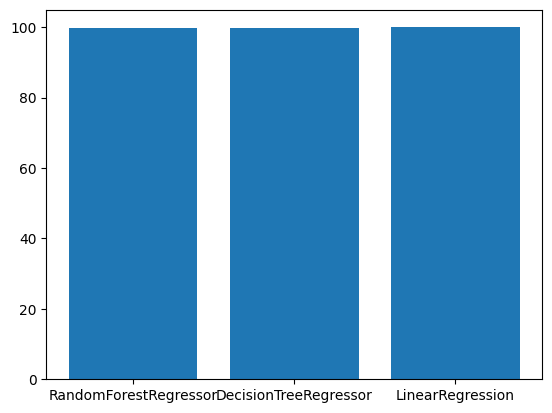

In [24]:
import matplotlib.pyplot as plt

plt.bar(errors.keys(),errors.values())
